In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Customer Segmentation Train.csv")
test = pd.read_csv("Customer Segmentation Test.csv") 

In [3]:
train.shape

(8068, 11)

In [4]:
test.shape

(2627, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [7]:
train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
test.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [9]:
train["Ever_Married"].value_counts()

Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64

In [10]:
train["Age"].describe()

count    8068.000000
mean       43.466906
std        16.711696
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

In [11]:
pd.cut(train["Age"], bins=4, labels=["A", "B", "C", "D"])

0       A
1       B
2       C
3       C
4       B
       ..
8063    A
8064    A
8065    A
8066    A
8067    B
Name: Age, Length: 8068, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<Axes: >

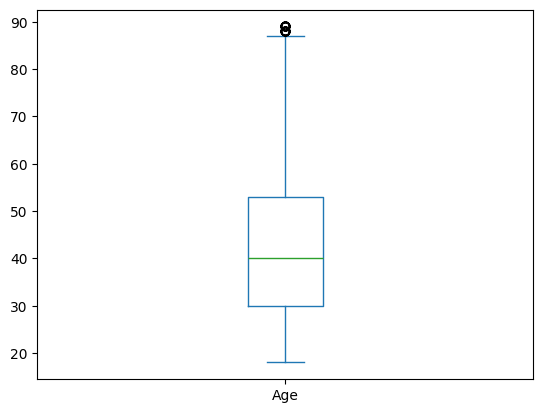

In [12]:
train["Age"].plot.box()

In [13]:
age_out = train["Age"].quantile(0.97)

<Axes: >

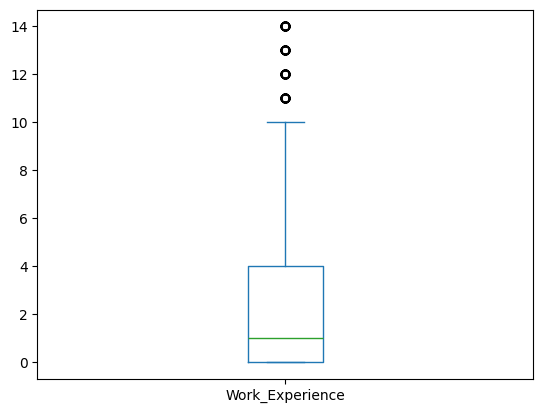

In [14]:
train["Work_Experience"].plot.box()

In [15]:
WE_out = train["Work_Experience"].quantile(0.97)

<Axes: >

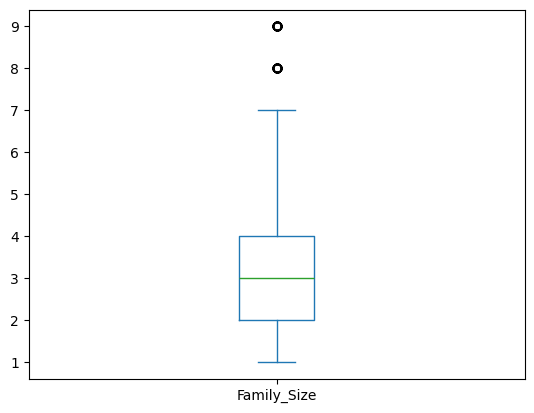

In [16]:
train["Family_Size"].plot.box()

In [17]:
family_out = train["Family_Size"].quantile(0.98)
family_out

7.0

In [18]:
train = train[(train["Age"]<age_out)&(train["Work_Experience"]<WE_out)&(train["Family_Size"]<family_out)]

<Axes: >

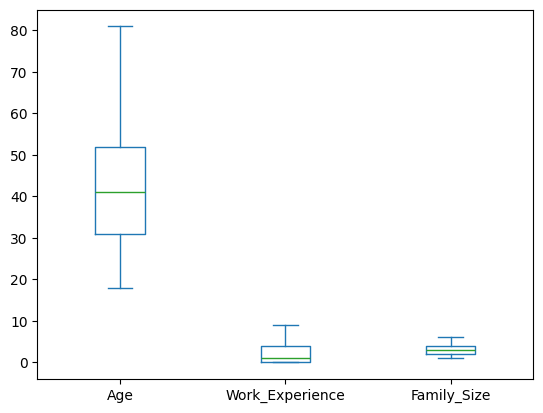

In [19]:
train[["Age", "Work_Experience", "Family_Size"]].plot.box()

In [20]:
train.isna().sum()

ID                   0
Gender               0
Ever_Married       100
Age                  0
Graduated           53
Profession          85
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               54
Segmentation         0
dtype: int64

In [21]:
train.dropna()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [22]:
train.shape

(6367, 11)

In [23]:
train["Ever_Married"].mode()

0    Yes
Name: Ever_Married, dtype: object

In [24]:
train["Ever_Married"].fillna("Yes", inplace=True)

In [25]:
train.isna().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated          53
Profession         85
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              54
Segmentation        0
dtype: int64

In [26]:
train["Graduated"].mode()

0    Yes
Name: Graduated, dtype: object

In [27]:
train["Graduated"].fillna("Yes", inplace=True)

In [28]:
train["Profession"].mode()

0    Artist
Name: Profession, dtype: object

In [29]:
train["Profession"].fillna("Artist", inplace=True)

In [30]:
train["Var_1"].value_counts()

Var_1
Cat_6    4175
Cat_4     811
Cat_3     648
Cat_2     352
Cat_7     154
Cat_1     104
Cat_5      69
Name: count, dtype: int64

In [31]:
train["Var_1"].fillna("Cat_6", inplace=True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6367 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6367 non-null   int64  
 1   Gender           6367 non-null   object 
 2   Ever_Married     6367 non-null   object 
 3   Age              6367 non-null   int64  
 4   Graduated        6367 non-null   object 
 5   Profession       6367 non-null   object 
 6   Work_Experience  6367 non-null   float64
 7   Spending_Score   6367 non-null   object 
 8   Family_Size      6367 non-null   float64
 9   Var_1            6367 non-null   object 
 10  Segmentation     6367 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 596.9+ KB


In [33]:
train.reset_index(drop=True, inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367 entries, 0 to 6366
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6367 non-null   int64  
 1   Gender           6367 non-null   object 
 2   Ever_Married     6367 non-null   object 
 3   Age              6367 non-null   int64  
 4   Graduated        6367 non-null   object 
 5   Profession       6367 non-null   object 
 6   Work_Experience  6367 non-null   float64
 7   Spending_Score   6367 non-null   object 
 8   Family_Size      6367 non-null   float64
 9   Var_1            6367 non-null   object 
 10  Segmentation     6367 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 547.3+ KB


<Axes: ylabel='Frequency'>

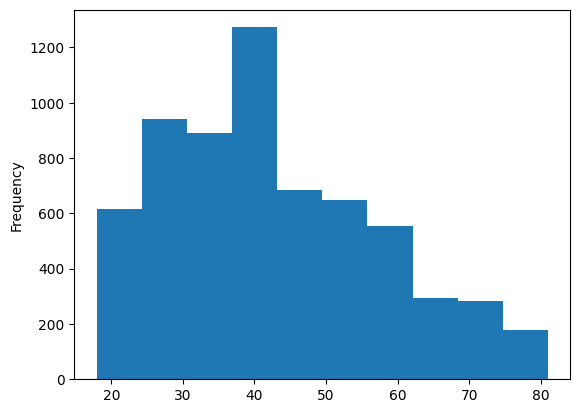

In [35]:
train["Age"].plot(kind="hist")

In [36]:
male = list(map(lambda x: 1 if x=="Male" else 0, train["Gender"]))

In [37]:
train["Gender"]=male

In [38]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,466315,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
2,461735,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
3,461319,1,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
4,460156,1,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [39]:
married = list(map(lambda x: 1 if x=="Yes" else 0, train["Ever_Married"]))

In [40]:
train["Ever_Married"] = married

In [41]:
train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,466315,0,1,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [42]:
grad = list(map(lambda x: 1 if x=="Yes" else 0, train["Graduated"]))

In [43]:
train["Graduated"] = grad

In [44]:
train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B


In [45]:
spend = list(map(lambda x: 0 if x=="Low" else (1 if x=="Average" else 2), train["Spending_Score"]))

In [46]:
spend

[0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 1,


In [47]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
2,461735,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
3,461319,1,1,56,0,Artist,0.0,Average,2.0,Cat_6,C
4,460156,1,0,32,1,Healthcare,1.0,Low,3.0,Cat_6,C


In [48]:
train["Spending_Score"]=spend

In [49]:
train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,466315,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
2,461735,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
3,461319,1,1,56,0,Artist,0.0,1,2.0,Cat_6,C
4,460156,1,0,32,1,Healthcare,1.0,0,3.0,Cat_6,C


In [50]:
dummies = pd.get_dummies(train["Profession"], dtype="float", drop_first=True)

In [51]:
df = pd.concat([train, dummies], axis=1)

In [52]:
df.drop("Profession", axis=1, inplace=True)

In [53]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,462809,1,0,22,0,1.0,0,4.0,Cat_4,D,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,466315,0,1,67,1,1.0,0,1.0,Cat_6,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,461735,1,1,67,1,0.0,2,2.0,Cat_6,B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461319,1,1,56,0,0.0,1,2.0,Cat_6,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460156,1,0,32,1,1.0,0,3.0,Cat_6,C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
df.drop("Var_1", axis=1, inplace=True)

In [55]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,462809,1,0,22,0,1.0,0,4.0,D,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,466315,0,1,67,1,1.0,0,1.0,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,461735,1,1,67,1,0.0,2,2.0,B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461319,1,1,56,0,0.0,1,2.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460156,1,0,32,1,1.0,0,3.0,C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
df.drop("ID", axis=1, inplace=True)

In [57]:
test["Gender"] = list(map(lambda x: 1 if x=="Male" else 0, test["Gender"]))
test["Graduated"] = list(map(lambda x: 1 if x=="Yes" else 0, test["Graduated"]))
test["Spending_Score"] = list(map(lambda x: 0 if x=="Low" else (1 if x=="Average" else 2), test["Spending_Score"]))

In [58]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,Yes,36,1,Engineer,0.0,0,1.0,Cat_6,B
1,458994,1,Yes,37,1,Healthcare,8.0,1,4.0,Cat_6,A
2,458996,0,Yes,69,0,NaN,0.0,0,1.0,Cat_6,A
3,459000,1,Yes,59,0,Executive,11.0,2,2.0,Cat_6,B
4,459001,0,No,19,0,Marketing,NaN,0,4.0,Cat_6,A


In [59]:
test["Ever_Married"] = list(map(lambda x: 1 if x=="Yes" else 0, test["Ever_Married"]))

In [60]:
test_dummies = pd.get_dummies(test["Profession"], drop_first=True, dtype="float")

In [61]:
test_df = pd.concat([test, test_dummies], axis=1)

In [62]:
test_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,458989,0,1,36,1,Engineer,0.0,0,1.0,Cat_6,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,458994,1,1,37,1,Healthcare,8.0,1,4.0,Cat_6,A,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,458996,0,1,69,0,NaN,0.0,0,1.0,Cat_6,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,459000,1,1,59,0,Executive,11.0,2,2.0,Cat_6,B,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,459001,0,0,19,0,Marketing,NaN,0,4.0,Cat_6,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,Healthcare,9.0,0,4.0,Cat_6,B,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2623,467958,0,0,35,1,Doctor,1.0,0,1.0,Cat_6,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624,467960,0,0,53,1,Entertainment,NaN,0,2.0,Cat_6,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2625,467961,1,1,47,1,Executive,1.0,2,5.0,Cat_4,C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
test_df.dropna(inplace=True)

In [64]:
test_df.drop(["ID", "Var_1", "Profession"], axis=1, inplace=True)

In [65]:
test_df.shape

(2213, 16)

In [66]:
test_df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,36,1,0.0,0,1.0,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,37,1,8.0,1,4.0,A,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,59,0,11.0,2,2.0,B,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1,1,47,1,0.0,2,5.0,C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,61,1,5.0,0,3.0,D,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,22,0,1.0,0,4.0,D,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,67,1,1.0,0,1.0,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,67,1,0.0,2,2.0,B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,56,0,0.0,1,2.0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,32,1,1.0,0,3.0,C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
X_train = df.drop("Segmentation", axis=1)
y_train = df["Segmentation"]

In [69]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,22,0,1.0,0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,67,1,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,67,1,0.0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,56,0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,32,1,1.0,0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
y_train

0       D
1       B
2       B
3       C
4       C
       ..
6362    B
6363    D
6364    D
6365    B
6366    B
Name: Segmentation, Length: 6367, dtype: object

In [71]:
X_test, y_test = test_df.drop("Segmentation", axis=1), test_df["Segmentation"]

In [72]:
X_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,36,1,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,37,1,8.0,1,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,59,0,11.0,2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1,1,47,1,0.0,2,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,61,1,5.0,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
y_test

0       B
1       A
3       B
5       C
6       D
       ..
2621    D
2622    B
2623    A
2625    C
2626    A
Name: Segmentation, Length: 2213, dtype: object

In [74]:
knn = KNeighborsClassifier(n_neighbors=7)

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [76]:
y_pred = knn.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.3289652056032535

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
knn.score(X_train, y_train)

0.5867755614889273

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
age = MinMaxScaler()
age.fit(np.array(X_train["Age"]).reshape(-1,1))
X_train["Age"] = age.transform(np.array(X_train["Age"]).reshape(-1,1))
X_test["Age"] = age.transform(np.array(X_test["Age"]).reshape(-1,1))

In [82]:
exp = MinMaxScaler()
exp.fit(np.array(X_train["Work_Experience"]).reshape(-1,1))
X_train["Work_Experience"] = exp.transform(np.array(X_train["Work_Experience"]).reshape(-1,1))
X_test["Work_Experience"] = exp.transform(np.array(X_test["Work_Experience"]).reshape(-1,1))

In [83]:
fam = MinMaxScaler()
fam.fit(np.array(X_train["Family_Size"]).reshape(-1,1))
X_train["Family_Size"] = fam.transform(np.array(X_train["Family_Size"]).reshape(-1,1))
X_test["Family_Size"] = fam.transform(np.array(X_test["Family_Size"]).reshape(-1,1))

In [84]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,0.063492,0,0.111111,0,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0.777778,1,0.111111,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.777778,1,0.000000,2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.603175,0,0.000000,1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0.222222,1,0.111111,0,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
X_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,0.285714,1,0.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.301587,1,0.888889,1,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0.650794,0,1.222222,2,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1,1,0.460317,1,0.000000,2,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,0.682540,1,0.555556,0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
model = KNeighborsClassifier(n_neighbors=11)

In [87]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [88]:
model.score(X_train, y_train)

0.5844196638919428

In [89]:
y_pred2 = model.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred2)

0.3176683235427022

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
m = KNeighborsClassifier()

In [93]:
gscv = GridSearchCV(param_grid={"n_neighbors":[19, 21, 23, 25, 27, 29, 31]}, 
                   estimator=m, n_jobs=-1, verbose=True, cv=10)

In [94]:
gscv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [19, 21, 23, 25, 27, 29, 31]},
             verbose=True)

In [95]:
gscv.best_score_

0.5161038871281458

In [96]:
gscv.best_params_

{'n_neighbors': 21}

## Examples 
* 1,2,3,4,5,9, 10, 11 - 1-5 = 95% ,, 9=97%, 10=98%, 11=100%

## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
model1 = DecisionTreeClassifier()

In [99]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
y_pred3 = model1.predict(X_test)

In [101]:
accuracy_score(y_test,y_pred3)

0.30908269317668324

In [102]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           A       0.36      0.28      0.31       715
           B       0.23      0.28      0.25       462
           C       0.23      0.33      0.27       389
           D       0.41      0.35      0.38       647

    accuracy                           0.31      2213
   macro avg       0.31      0.31      0.30      2213
weighted avg       0.33      0.31      0.31      2213



## Logistic Regressison

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
reg = LogisticRegression()

In [105]:
reg.fit(X_train,y_train)

LogisticRegression()

In [106]:
y_pred4 = reg.predict(X_test)

In [107]:
accuracy_score(y_test,y_pred4)

0.3235427022141889

In [108]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           A       0.35      0.29      0.32       715
           B       0.23      0.13      0.17       462
           C       0.24      0.45      0.32       389
           D       0.44      0.42      0.43       647

    accuracy                           0.32      2213
   macro avg       0.31      0.32      0.31      2213
weighted avg       0.33      0.32      0.32      2213



## Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model2 = RandomForestClassifier()

In [111]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
y_pred5 = model2.predict(X_test)

In [113]:
accuracy_score(y_test,y_pred5)

0.3226389516493448

In [114]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           A       0.36      0.26      0.30       715
           B       0.25      0.28      0.26       462
           C       0.25      0.37      0.30       389
           D       0.43      0.40      0.41       647

    accuracy                           0.32      2213
   macro avg       0.32      0.33      0.32      2213
weighted avg       0.34      0.32      0.32      2213

